## easyocr

In [1]:
import io
import logging

In [12]:
import sys
sys.path.append("C:/Users/cpprh/Documents/GitHub/EasyOCR")
import easyocr

In [13]:
import PIL
from PIL import Image, ImageOps
import numpy

In [19]:
#reader = easyocr.Reader(['ko'], gpu=False) 
result = reader.readtext("cc.png")

print(result)

[([[149, 45], [361, 45], [361, 135], [149, 135]], '불 안 감', 0.4946411463091572), ([[57, 171], [341, 171], [341, 233], [57, 233]], '안폐끼 대안동고', 0.10548396585720951), ([[49, 233], [515, 233], [515, 293], [49, 293]], '이 이 불안맣음 용 수 ;옆구:', 0.020416124691476963)]


In [20]:
import cv2

In [23]:
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

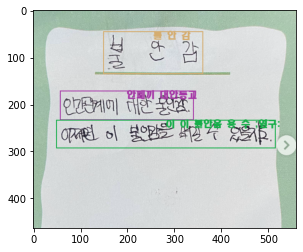

In [34]:
import easyocr
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

reader = easyocr.Reader(['ko']) # need to run only once to load model into memory
result = reader.readtext('cc.png')

img    = cv2.imread('cc.png')

img = Image.fromarray(img)
font = ImageFont.truetype("fonts/HMKMRHD.TTF",20)
draw = ImageDraw.Draw(img)

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")


for i in result :
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]
    
    color_idx = random.randint(0,255)
    color = [int(c) for c in COLORS[color_idx]]
    
#    cv2.putText(img, str(i[1]), (int((x + x + w) / 2) , y-2), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
#    img = cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
    draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)

plt.imshow(img)
plt.show()


In [35]:
for i in range(len(result)):
    print(result[i][1])

불 안 감
안폐끼 대안동고
이 이 불안음 용 수 ;옆구:


## tesseract

In [64]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

In [74]:
print(pytesseract.image_to_string('dd.png', lang='kor+eng', config='-c preserve_interword_spaces=1 --psm 4'))

o 4 a “a  it   E                              www.happysoft.co.kr

EGE
os |     www-happysoft.co.kr

보안연구소 /수석연원 김 Sw

M 010 8638 4839
E chris@happysoft.co.kr

서울시 강남구 선릉로 92길 28 탑빌딩 4층 401호



In [73]:
print(pytesseract.image_to_string(Image.open('dd.png'), lang='kor+eng'))

o 4 a “a  it   E                              www.happysoft.co.kr

EGE
os |     www-happysoft.co.kr

M 010 8638 4839
E chris@happysoft.co.kr

서울시 강남구 선릉로 92길 28 탑빌딩 4층 401호

